In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = load_data()
df['ArticleChannel'].unique()

array(['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie'], dtype=object)

In [22]:
# select categories to analyze
channels = ['Kultur', 'Gesundheit']

filtered_df, articles_per_user, selected_users = filter_users(df, channels, min_articles=5, max_num_users=2000)
print(f"Number of selected users: {len(selected_users)}")

Number of selected users: 620


In [23]:
# create graph
weights = iom(selected_users, articles_per_user)
threshold = np.percentile(weights.flatten(), 75)
graph = build_graph(selected_users, weights, threshold)

  0%|          | 0/620 [00:00<?, ?it/s]

100%|██████████| 620/620 [00:02<00:00, 288.17it/s]


In [24]:
# print distribution of comments in the selected categories
category_comments_percentage = filtered_df['ArticleChannel'].value_counts().div(len(filtered_df))
print(category_comments_percentage)

ArticleChannel
Kultur        0.676071
Gesundheit    0.323929
Name: count, dtype: float64


In [25]:
# save graph for gephi
# category_count_df = most_common_category_per_user(filtered_df)
# nx.set_node_attributes(graph, category_count_df['most_common'].to_dict(), 'category')
# nx.write_gexf(graph, '../graph/iom_graph_sport_wissenschaft.gexf')

## Label Propagation

In [26]:
# label_prop_communities = list(nx.community.asyn_lpa_communities(graph, 'weight'))
# print(f"Number of communities: {len(label_prop_communities)}")
# print(f" Sizes of the communities: {[len(c) for c in label_prop_communities]}")
# print(f"Modularity: {nx.algorithms.community.modularity(graph, label_prop_communities)}")

In [27]:
# comments_in_category_per_community(label_prop_communities,
#                                    filtered_df,
#                                    percentage=True,
#                                    weight_by_category_distribution=True,
#                                    save_dir='../plots/label_prop_' + '_'.join(channels) + '.svg')

In [28]:
# plot_subtopics_per_community(label_prop_communities, filtered_df, 8, '../plots/label_prop_subtopics_' + '_'.join(channels) + '.svg')

In [29]:
# plot_gender_per_community(label_prop_communities, filtered_df, '../plots/label_prop_gender_' + '_'.join(channels) + '.svg')

## Max Modularity

In [30]:
max_modularity_communities = nx.community.modularity_max.greedy_modularity_communities(graph, 'weight')
print(f"Number of communities: {len(max_modularity_communities)}")
print(f" Sizes of the communities: {[len(c) for c in max_modularity_communities]}")
print(f"Modularity: {nx.algorithms.community.modularity(graph, max_modularity_communities)}")

Number of communities: 3
 Sizes of the communities: [353, 255, 12]
Modularity: 0.10819072660292056


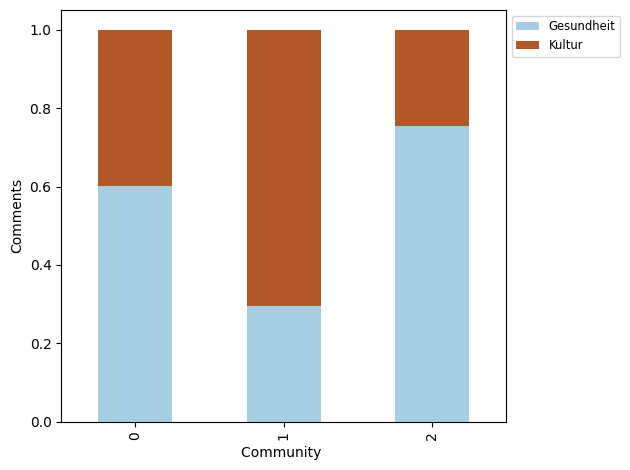

In [31]:
# generate dataframe with number of comments (or a weighted variant, if normalized) per category for each community
comments_in_category_per_community(max_modularity_communities,
                                   filtered_df,
                                   percentage=True,
                                   weight_by_category_distribution=True,
                                   save_dir='../plots/max_modularity_' + '_'.join(channels) + '.svg')


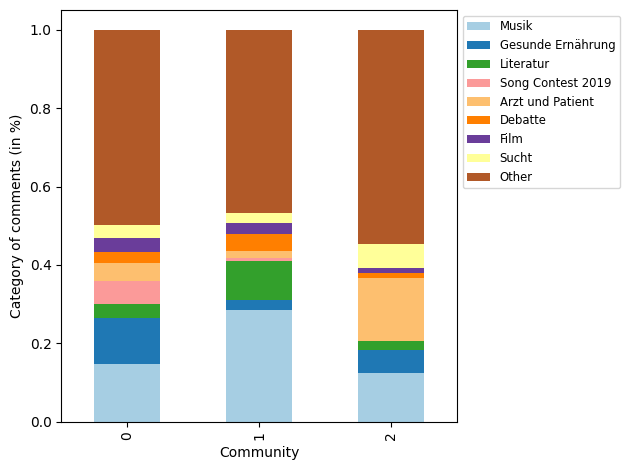

In [32]:
plot_subtopics_per_community(max_modularity_communities, filtered_df, 8, '../plots/max_modularity_subtopics_' + '_'.join(channels) + '.svg')

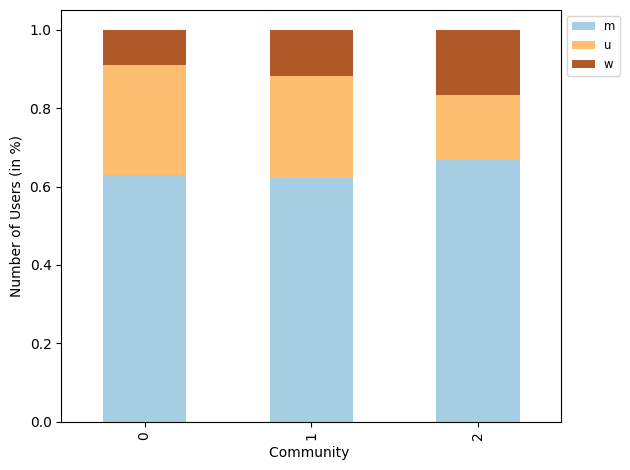

In [33]:
plot_gender_per_community(max_modularity_communities, filtered_df, '../plots/max_modularity_gender_' + '_'.join(channels) + '.svg')

## Louvain Communities

In [34]:
louvain_communities = nx.community.louvain_communities(graph, 'weight')
print(f"Number of communities: {len(louvain_communities)}")
print(f" Sizes of the communities: {[len(c) for c in louvain_communities]}")
print(f"Modularity: {nx.algorithms.community.modularity(graph, louvain_communities)}")

Number of communities: 4
 Sizes of the communities: [154, 180, 149, 137]
Modularity: 0.1301870132164351


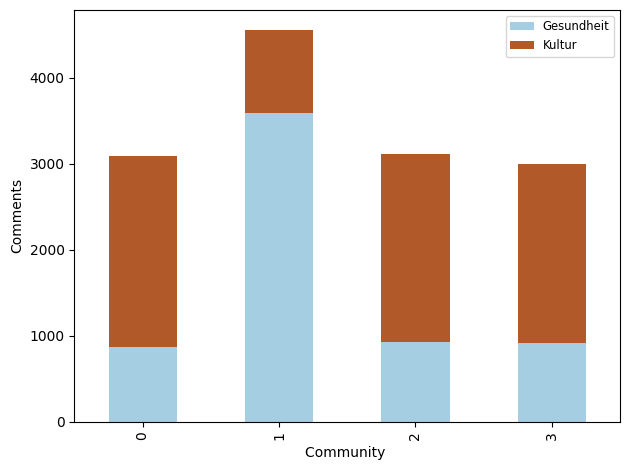

In [38]:
comments_in_category_per_community(louvain_communities,
                                   filtered_df,
                                   percentage=False,
                                   weight_by_category_distribution=True,
                                   save_dir='../plots/louvain_' + '_'.join(channels) + '.svg')

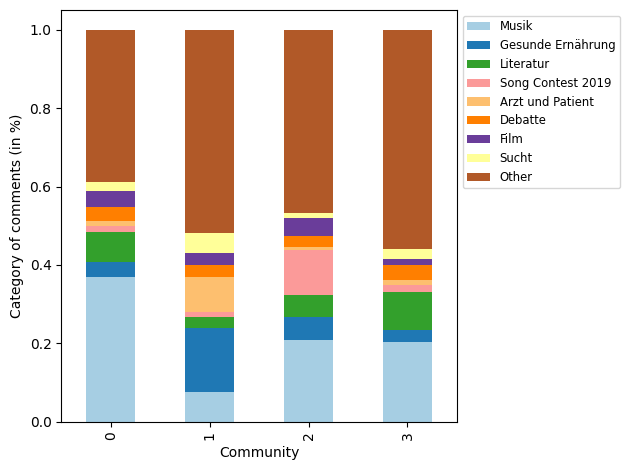

In [36]:
plot_subtopics_per_community(louvain_communities, filtered_df, 8, '../plots/louvain_subtopics_' + '_'.join(channels) + '.svg')

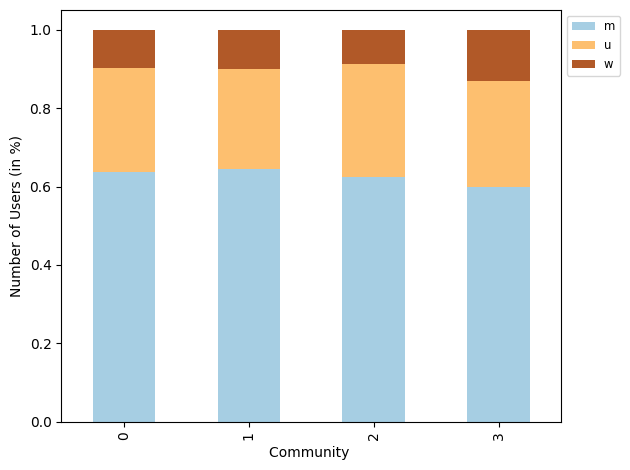

In [37]:
plot_gender_per_community(louvain_communities, filtered_df, '../plots/louvain_gender_' + '_'.join(channels) + '.svg')